# Исследовательский анализ данных

In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
%matplotlib inline

import seaborn as sns
sns.set_theme(style="ticks")

Загурзим все наши данные и посмотрим что они из себя предстоваляют, в нашем распоряжении 4 файла:
- contract.csv - данные о контрактах
- personal.csv - персональная информации о клиентах
- internet.csv - данные о подключенном интернете
- phone.csv - данные о подключенном телефоне

In [2]:
contracts = pd.read_csv('./datasets/final_provider/contract.csv')
personals = pd.read_csv('./datasets/final_provider/personal.csv')
internet = pd.read_csv('./datasets/final_provider/internet.csv')
phone = pd.read_csv('./datasets/final_provider/phone.csv')

In [3]:
def df_info(df):
    df.info()
    display(df.describe())
    display(df.sample(10))
    print("Количество полных дубликатов в датафрэйме: {}".format(contracts.duplicated().sum()))

## Анализ данных о контрактах

Изучим наш набор данных 

In [4]:
df_info(contracts)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   BeginDate         7043 non-null   object 
 2   EndDate           7043 non-null   object 
 3   Type              7043 non-null   object 
 4   PaperlessBilling  7043 non-null   object 
 5   PaymentMethod     7043 non-null   object 
 6   MonthlyCharges    7043 non-null   float64
 7   TotalCharges      7043 non-null   object 
dtypes: float64(1), object(7)
memory usage: 440.3+ KB


,MonthlyCharges
count,7043.000000
mean,64.761692
std,30.090047
min,18.250000
25%,35.500000
50%,70.350000
75%,89.850000
max,118.750000


,customerID,BeginDate,EndDate,Type,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges
2000,7020-OZKXZ,2019-05-01,No,Month-to-month,No,Credit card (automatic),75.50,637.4
3299,4282-MSACW,2014-06-01,No,One year,Yes,Credit card (automatic),117.20,8035.95
3795,1508-DFXCU,2019-02-01,No,Month-to-month,Yes,Electronic check,81.45,912
6450,4609-KNNWG,2017-11-01,No,Two year,No,Mailed check,19.90,550.1
1518,1925-GMVBW,2019-09-01,No,Month-to-month,No,Credit card (automatic),20.55,96.1
1987,5419-KLXBN,2017-12-01,2020-01-01 00:00:00,Month-to-month,Yes,Bank transfer (automatic),89.15,2257.75
2057,2189-UXTKY,2018-02-01,2019-12-01 00:00:00,Month-to-month,Yes,Electronic check,79.20,1742.75
2773,2770-NSVDG,2018-02-01,No,Month-to-month,No,Electronic check,29.10,688
2335,3113-IWHLC,2019-09-01,No,Month-to-month,Yes,Mailed check,55.80,274.35
2864,1564-HJUVY,2019-10-01,No,Month-to-month,Yes,Bank transfer (automatic),63.75,226.2


Количество полных дубликатов в датафрэйме: 0


В датафрэйме с информацией о контрактах у нас 7043 записи, без пропусков и без полных дубликатов, многие категориальные поля представлены в виде не правильного типа, например BeginDate(дата), EndDate(дата), TotalCharges(число), а так же категориальные переменные Type, PaperlessBilling и PaymentMethod представлены как строки, PaperlessBilling должно быть булевым типом.

Приведем наши колонки к нужному типу, чтобы лучше изучить данные, начнём с преобразования в даты столбцы BeginDate и EndDate

In [5]:
contracts['BeginDate'] = pd.to_datetime(contracts['BeginDate'], format='%Y-%m-%d')
contracts['BeginDate_year'] = pd.DatetimeIndex(contracts['BeginDate']).year
contracts['BeginDate_month'] = pd.DatetimeIndex(contracts['BeginDate']).month
contracts['EndDate'] = pd.to_datetime(contracts['EndDate'], format='%Y-%m-%d %H:%M:%S', errors='coerce')
contracts['EndDate_year'] = pd.DatetimeIndex(contracts['EndDate']).year
contracts['EndDate_month'] = pd.DatetimeIndex(contracts['EndDate']).month
contracts.info()
contracts.sample(5)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   customerID        7043 non-null   object        
 1   BeginDate         7043 non-null   datetime64[ns]
 2   EndDate           1869 non-null   datetime64[ns]
 3   Type              7043 non-null   object        
 4   PaperlessBilling  7043 non-null   object        
 5   PaymentMethod     7043 non-null   object        
 6   MonthlyCharges    7043 non-null   float64       
 7   TotalCharges      7043 non-null   object        
 8   BeginDate_year    7043 non-null   int64         
 9   BeginDate_month   7043 non-null   int64         
 10  EndDate_year      1869 non-null   float64       
 11  EndDate_month     1869 non-null   float64       
dtypes: datetime64[ns](2), float64(3), int64(2), object(5)
memory usage: 660.4+ KB


,customerID,BeginDate,EndDate,Type,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,BeginDate_year,BeginDate_month,EndDate_year,EndDate_month
5409,6005-OBZPH,2017-11-01,2020-01-01,Month-to-month,Yes,Electronic check,89.15,2277.65,2017,11,2020.0,1.0
725,6549-YMFAW,2019-05-01,NaT,Month-to-month,Yes,Mailed check,21.25,204.55,2019,5,NaN,NaN
4908,3957-LXOLK,2017-09-01,2020-01-01,Month-to-month,Yes,Electronic check,106.15,3152.5,2017,9,2020.0,1.0
4039,8161-QYMTT,2019-07-01,NaT,Month-to-month,Yes,Electronic check,94.10,701.3,2019,7,NaN,NaN
4367,3340-QBBFM,2017-02-01,NaT,One year,No,Credit card (automatic),54.10,1992.85,2017,2,NaN,NaN


После привидения к типу datetime мы можем увидеть что у нас появились пропуски в EndDate, что можно трактовать как действующий контракт, таким образом в нашем датафрэйме 1869 завершенных контрактов. Но так же возможно что пользователь закрыл один контракт и открыл другой, проверим данные на дубликаты по customerId.

In [6]:
print("Количество пользователей закрывших контракт и открывших новый: {}".format(contracts['customerID'].duplicated().sum()))

Количество пользователей закрывших контракт и открывших новый: 0


Пользователей открывших новые контракты нет.

Преобразуем поле PaperlessBilling в булевый тип, предварительно проверив позволяют ли это сделать его значения.

In [7]:
contracts['PaperlessBilling'].value_counts()

Yes    4171
No     2872
Name: PaperlessBilling, dtype: int64

Да, в нашем поле всего лишь два значения, можем смело преобразовывать их в 0 и 1, где 0 - No и 1 - Yes.

In [8]:
def cast_yes_no_to_one_zero(df, columns):
    mapper = {'Yes': 1, 'No': 0}
    for column in columns:
        try:
            df[column] = df[column].replace(mapper)
        except:
            print("Не удалось конвертировать колонку {}".format(column))
    df.info()
    return df

In [9]:
contracts = cast_yes_no_to_one_zero(contracts, ['PaperlessBilling'])

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   customerID        7043 non-null   object        
 1   BeginDate         7043 non-null   datetime64[ns]
 2   EndDate           1869 non-null   datetime64[ns]
 3   Type              7043 non-null   object        
 4   PaperlessBilling  7043 non-null   int64         
 5   PaymentMethod     7043 non-null   object        
 6   MonthlyCharges    7043 non-null   float64       
 7   TotalCharges      7043 non-null   object        
 8   BeginDate_year    7043 non-null   int64         
 9   BeginDate_month   7043 non-null   int64         
 10  EndDate_year      1869 non-null   float64       
 11  EndDate_month     1869 non-null   float64       
dtypes: datetime64[ns](2), float64(3), int64(3), object(4)
memory usage: 660.4+ KB


Преобразуем TotalCharges в число

In [10]:
contracts['TotalCharges'] = pd.to_numeric(contracts['TotalCharges'], errors='coerce')
contracts.info()
contracts.sample(5)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   customerID        7043 non-null   object        
 1   BeginDate         7043 non-null   datetime64[ns]
 2   EndDate           1869 non-null   datetime64[ns]
 3   Type              7043 non-null   object        
 4   PaperlessBilling  7043 non-null   int64         
 5   PaymentMethod     7043 non-null   object        
 6   MonthlyCharges    7043 non-null   float64       
 7   TotalCharges      7032 non-null   float64       
 8   BeginDate_year    7043 non-null   int64         
 9   BeginDate_month   7043 non-null   int64         
 10  EndDate_year      1869 non-null   float64       
 11  EndDate_month     1869 non-null   float64       
dtypes: datetime64[ns](2), float64(4), int64(3), object(3)
memory usage: 660.4+ KB


,customerID,BeginDate,EndDate,Type,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,BeginDate_year,BeginDate_month,EndDate_year,EndDate_month
4233,4664-NJCMS,2017-05-01,NaT,Two year,0,Bank transfer (automatic),59.55,2016.30,2017,5,NaN,NaN
1701,6097-EQISJ,2014-04-01,2019-10-01,One year,1,Credit card (automatic),102.45,6615.15,2014,4,2019.0,10.0
246,0303-UNCIP,2016-09-01,NaT,One year,0,Mailed check,65.00,2531.80,2016,9,NaN,NaN
5084,8966-OIQHG,2018-04-01,NaT,One year,0,Bank transfer (automatic),20.75,452.35,2018,4,NaN,NaN
4585,1069-XAIEM,2019-11-01,2019-12-01,Month-to-month,1,Electronic check,85.05,85.05,2019,11,2019.0,12.0


С преобразованием данных мы закончили, теперь можно посмотреть на значения наших категориальных полей.

In [11]:
contracts['Type'].value_counts()

Month-to-month    3875
Two year          1695
One year          1473
Name: Type, dtype: int64

In [12]:
contracts['PaymentMethod'].value_counts()

Electronic check             2365
Mailed check                 1612
Bank transfer (automatic)    1544
Credit card (automatic)      1522
Name: PaymentMethod, dtype: int64

В дальнейшем перед подготовкой данных к обучению воспользовавшись Ordinal Encoding или One-Hot Encoding мы приведем данные к нужному формату.

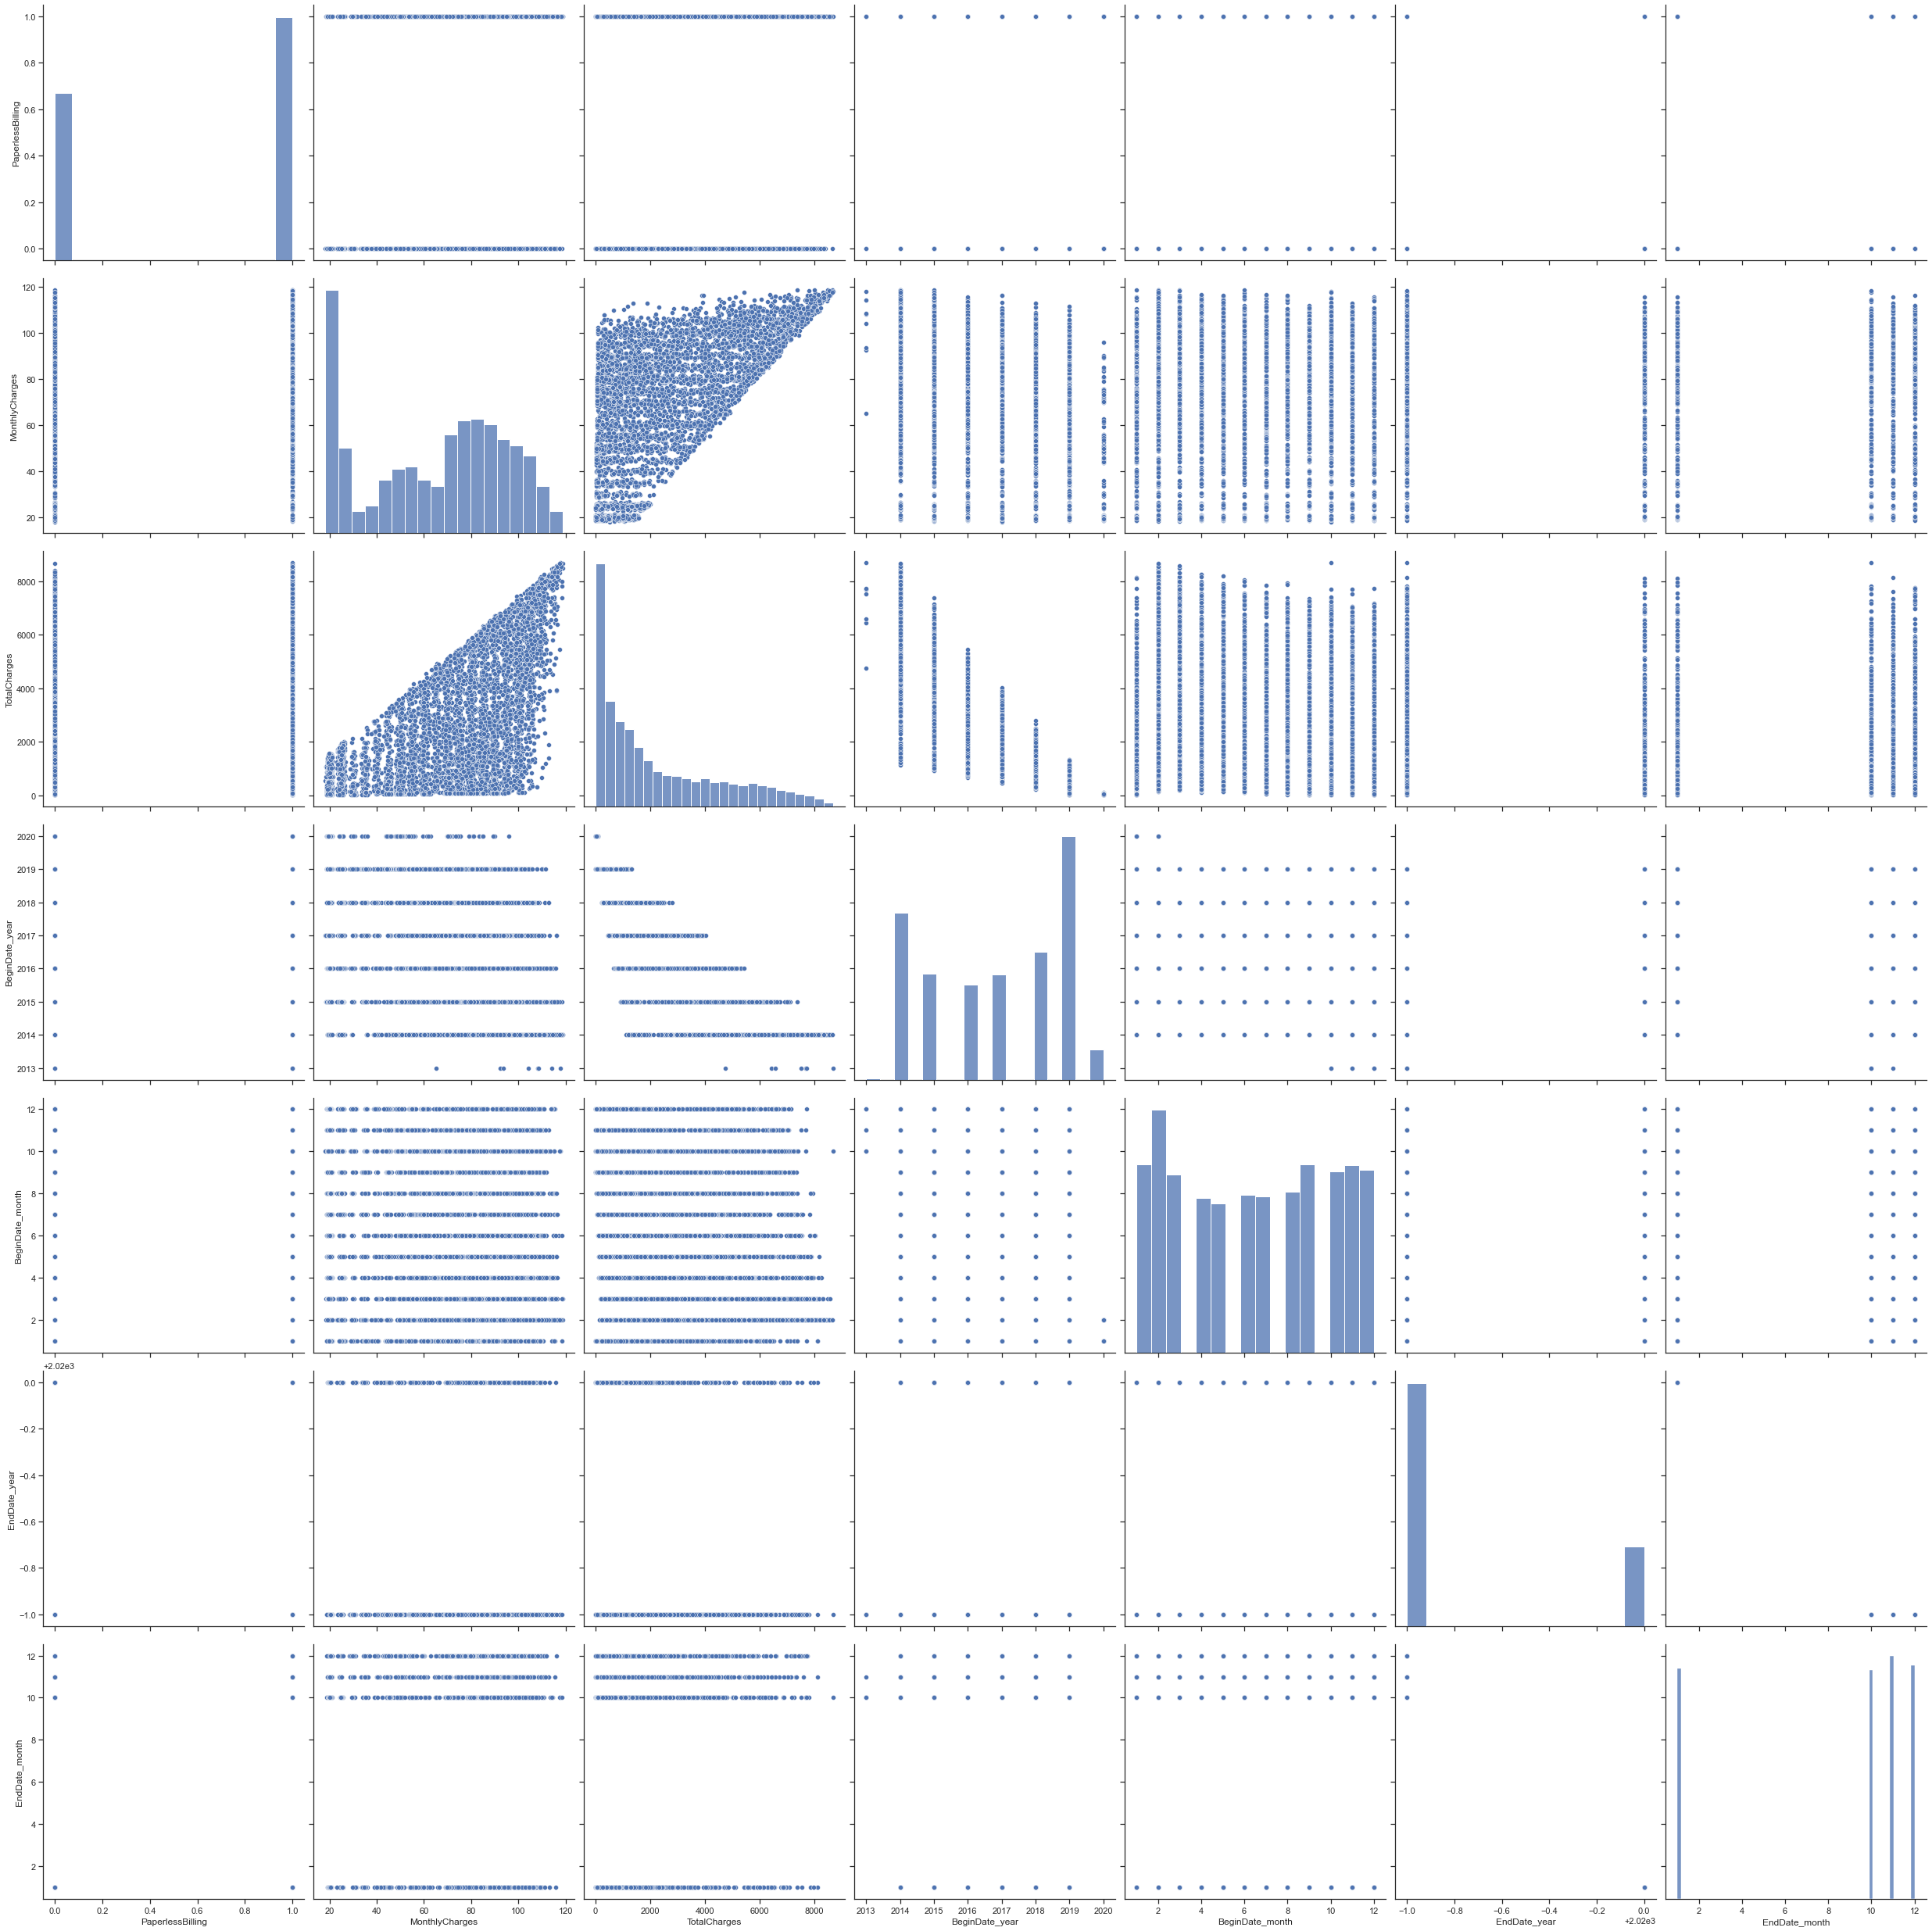

In [13]:
sns.pairplot(contracts, height=5);

## Анализ персональных данных

Посмотрим на персональные данные

In [14]:
df_info(personals)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   customerID     7043 non-null   object
 1   gender         7043 non-null   object
 2   SeniorCitizen  7043 non-null   int64 
 3   Partner        7043 non-null   object
 4   Dependents     7043 non-null   object
dtypes: int64(1), object(4)
memory usage: 275.2+ KB


,SeniorCitizen
count,7043.000000
mean,0.162147
std,0.368612
min,0.000000
25%,0.000000
50%,0.000000
75%,0.000000
max,1.000000


,customerID,gender,SeniorCitizen,Partner,Dependents
2040,7398-HPYZQ,Male,0,Yes,No
2320,1187-WILMM,Male,0,Yes,Yes
5163,3472-OAOOR,Male,0,Yes,Yes
5489,0804-XBFBV,Female,0,No,Yes
4266,5445-PZWGX,Male,0,No,No
5305,9027-TMATR,Female,0,Yes,No
5074,2821-WARNZ,Female,0,No,Yes
4316,8413-YNHNV,Male,0,No,No
5026,1401-FTHFQ,Male,0,Yes,Yes
2695,0254-KCJGT,Male,0,Yes,No


Количество полных дубликатов в датафрэйме: 0


В датафрэйме с информацией о персональных данных у нас 7043 записи, без пропусков и без полных дубликатов. В нём так же переведём поля gender, Partner и Dependents в поля с 0 и 1, предварительно проверив значения в этих полях.

In [15]:
personals['gender'].value_counts()

Male      3555
Female    3488
Name: gender, dtype: int64

In [16]:
mapper = {'Male': 1, 'Female': 0}
personals['gender'] = personals['gender'].replace(mapper)
personals.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   customerID     7043 non-null   object
 1   gender         7043 non-null   int64 
 2   SeniorCitizen  7043 non-null   int64 
 3   Partner        7043 non-null   object
 4   Dependents     7043 non-null   object
dtypes: int64(2), object(3)
memory usage: 275.2+ KB


In [17]:
personals = cast_yes_no_to_one_zero(personals, ['Partner', 'Dependents'])

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   customerID     7043 non-null   object
 1   gender         7043 non-null   int64 
 2   SeniorCitizen  7043 non-null   int64 
 3   Partner        7043 non-null   int64 
 4   Dependents     7043 non-null   int64 
dtypes: int64(4), object(1)
memory usage: 275.2+ KB


In [18]:
personals.sample(10)

,customerID,gender,SeniorCitizen,Partner,Dependents
4522,7305-ZWMAJ,1,0,1,0
6207,6769-DYBQN,1,1,0,0
3212,0585-EGDDA,1,0,1,0
55,1658-BYGOY,1,1,0,0
3394,9052-DHNKM,1,0,0,0
6163,3427-GGZZI,0,0,1,0
864,4124-MMETB,1,0,0,0
1370,7596-IIWYC,0,0,0,0
2638,6769-DCQLI,1,0,0,0
4500,2830-LEWOA,1,0,1,1


## Анализ данных о подключенном интернете

In [19]:
df_info(internet)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5517 entries, 0 to 5516
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   customerID        5517 non-null   object
 1   InternetService   5517 non-null   object
 2   OnlineSecurity    5517 non-null   object
 3   OnlineBackup      5517 non-null   object
 4   DeviceProtection  5517 non-null   object
 5   TechSupport       5517 non-null   object
 6   StreamingTV       5517 non-null   object
 7   StreamingMovies   5517 non-null   object
dtypes: object(8)
memory usage: 344.9+ KB


,customerID,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies
count,5517,5517,5517,5517,5517,5517,5517,5517
unique,5517,2,2,2,2,2,2,2
top,4504-YOULA,Fiber optic,No,No,No,No,No,No
freq,1,3096,3498,3088,3095,3473,2810,2785


,customerID,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies
1909,8982-NHAVY,Fiber optic,No,No,Yes,No,Yes,Yes
454,6815-ABQFQ,Fiber optic,No,Yes,No,Yes,Yes,Yes
1787,8064-RAVOH,DSL,No,No,Yes,No,No,No
5496,1122-JWTJW,Fiber optic,No,No,No,No,No,No
2716,3982-DQLUS,Fiber optic,Yes,Yes,No,No,No,No
4533,4143-OOBWZ,Fiber optic,No,Yes,No,No,No,No
4709,1555-DJEQW,Fiber optic,Yes,Yes,Yes,Yes,Yes,Yes
1178,9242-TKFSV,DSL,Yes,Yes,Yes,Yes,Yes,Yes
5183,9259-PACGQ,DSL,Yes,Yes,No,Yes,No,No
2141,6402-SSEJG,DSL,Yes,Yes,Yes,No,Yes,Yes


Количество полных дубликатов в датафрэйме: 0


В датафрэйме с информацией о подключенном интернете у нас 5517 записи, без пропусков и без полных дубликатов. В нём так же переведём поля со значениеями Yes/No в 1 и 0.

In [20]:
internet = cast_yes_no_to_one_zero(internet, ['OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies'])

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5517 entries, 0 to 5516
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   customerID        5517 non-null   object
 1   InternetService   5517 non-null   object
 2   OnlineSecurity    5517 non-null   int64 
 3   OnlineBackup      5517 non-null   int64 
 4   DeviceProtection  5517 non-null   int64 
 5   TechSupport       5517 non-null   int64 
 6   StreamingTV       5517 non-null   int64 
 7   StreamingMovies   5517 non-null   int64 
dtypes: int64(6), object(2)
memory usage: 344.9+ KB


In [21]:
internet.sample(10)

,customerID,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies
3882,7852-LECYP,Fiber optic,1,1,0,0,0,1
1728,6296-DDOOR,DSL,0,1,0,0,1,0
654,0036-IHMOT,Fiber optic,0,1,1,1,1,1
4358,3057-VJJQE,DSL,1,0,0,0,0,0
3137,4006-HKYHO,DSL,1,1,1,1,1,1
3695,4106-HADHQ,DSL,1,0,1,1,1,1
4349,9611-CTWIH,Fiber optic,0,0,0,0,1,1
4310,1976-CFOCS,DSL,0,0,0,0,0,0
3293,2034-CGRHZ,Fiber optic,0,1,1,0,1,1
3232,2716-GFZOR,Fiber optic,1,1,1,0,0,0


## Анализ данных о подключенном телефоне

In [22]:
df_info(phone)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6361 entries, 0 to 6360
Data columns (total 2 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   customerID     6361 non-null   object
 1   MultipleLines  6361 non-null   object
dtypes: object(2)
memory usage: 99.5+ KB


,customerID,MultipleLines
count,6361,6361
unique,6361,2
top,4504-YOULA,No
freq,1,3390


,customerID,MultipleLines
4886,5376-DEQCP,No
2950,9710-ZUSHQ,Yes
1726,3466-WAESX,Yes
285,5020-ZSTTY,Yes
2202,8835-VSDSE,No
959,2074-GKOWZ,No
1926,3521-HTQTV,Yes
5552,7153-CHRBV,No
29,3413-BMNZE,No
1892,5986-WWXDV,No


Количество полных дубликатов в датафрэйме: 0


В датафрэйме с информацией о подключенном телефоне у нас 6361 запись, без пропусков и без полных дубликатов. В нём переведём поле MultipleLines Yes/No в 1 и 0.

In [23]:
phone = cast_yes_no_to_one_zero(phone, ['MultipleLines'])

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6361 entries, 0 to 6360
Data columns (total 2 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   customerID     6361 non-null   object
 1   MultipleLines  6361 non-null   int64 
dtypes: int64(1), object(1)
memory usage: 99.5+ KB


In [24]:
phone.sample(10)

,customerID,MultipleLines
4656,3850-OKINF,1
2998,7774-OJSXI,1
3585,5712-VBOXD,0
4372,6729-FZWSY,0
1989,2626-VEEWG,0
3546,5989-AXPUC,1
1767,0854-UYHZD,0
5285,9066-QRSDU,1
4785,9530-EHPOH,1
3773,8874-EJNSR,1
